# Libraries and Data Information

## Installations

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Create Virtual Environment.

In [2]:
#!python -m venv /content/drive/My Drive/my_env  # Store in your Drive

### Activate Environment

In [3]:
!source /content/drive/My Drive/my_env/bin/activate

/bin/bash: line 1: /content/drive/My: No such file or directory


## Install Packages.

In [4]:
!pip install numpy  # Install or upgrade NumPy first
!pip install scipy==1.10.0 # Install scipy specifically version 1.10.0
!pip install scikit-learn  # Install scikit-learn
!pip install tensorflow  # Install TensorFlow
!pip install torch  # Install PyTorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.0 which is incompatible.
scikit-image 0.25.2 requires sci

In [5]:
!pip install numpy  # Install NumPy first
!pip install numpy.rec # Install numpy.rec specifically.
!pip install scipy==1.10.0 # Reinstall SciPy with the version you need.
#!pip install keras_spiking --upgrade # Install keras_spiking
!pip install keras_spiking # Install keras_spiking
!pip install statsforecast

ERROR: Could not find a version that satisfies the requirement numpy.rec (from versions: none)
ERROR: No matching distribution found for numpy.rec
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.3 MB/s eta 0:00:00


## Libraries

In [1]:
#matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.pyplot as scatter


from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# keras/tensorflow imports
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Flatten, Conv1D
from keras.layers import MaxPooling1D, TimeDistributed, GlobalAveragePooling1D
from keras.models import Sequential
import keras_spiking
from keras_spiking import SpikingActivation

# import multiprocessing
from threading import Lock
from multiprocessing import Process

# warnings imports
import warnings
warnings.filterwarnings("ignore")

#statsmodels imports
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# statsforecast library
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# torch imports
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

# Nengo Imports
#import nengo

# Other imports
#from urllib.request import urlretrieve
import collections
import numpy as np
import pandas as pd
from math import sqrt
import os
import pickle
from datetime import datetime, timedelta
from google.colab import drive

cpu is available.


# Load Data

In [2]:
from google.colab import files, runtime
data_to_load = files.upload()

Saving AEP_hourly_sorted.csv to AEP_hourly_sorted.csv


# Read and Check Data

## Preprocessing stage.

In [3]:
filename_list = list(data_to_load.keys())
filename = filename_list[0]

In [4]:
df_entire = pd.read_csv(filename)
df_entire.head()

,Datetime,AEP_MW
0,10/1/2004 1:00,12379
1,10/1/2004 2:00,11935
2,10/1/2004 3:00,11692
3,10/1/2004 4:00,11597
4,10/1/2004 5:00,11681


In [5]:
df_entire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [6]:
title_name = 'Monthly Mean Total Sunspot Number, from 1749/01/01 to 2017/08/31'

## Other Pre-Processing Information

In [7]:
# We must convert the Datetime column to Datetime format
df_entire['Datetime'] = pd.to_datetime(df_entire['Datetime'])

# We index the Datetime column after transformation
df_entire.set_index('Datetime', inplace=True)
df_entire.head()

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379
2004-10-01 02:00:00,11935
2004-10-01 03:00:00,11692
2004-10-01 04:00:00,11597
2004-10-01 05:00:00,11681


In [8]:
# checking missing data
df_entire.isna().sum()

,0
AEP_MW,0


In [9]:
# Let's look at the years in the data set
years = df_entire.index.year.unique()
years

Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018],
      dtype='int32', name='Datetime')

## Plot Hourly Energy Consumption (AEP_MW) based on Trends and Seasonality.

In [10]:
def plot_aep_hr(select_df, start, end, seasonality, title_name, feature):
    plt.figure(figsize=(16, 16))
    plt.plot(select_df[start:end], label=feature)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.ylabel(feature, fontsize = 20)
    plt.xlabel("Date", fontsize = 20)
    plt.title("{0} ({1})".format(title_name, seasonality),
              fontsize = 20)
    plt.show()

### Trend Plot

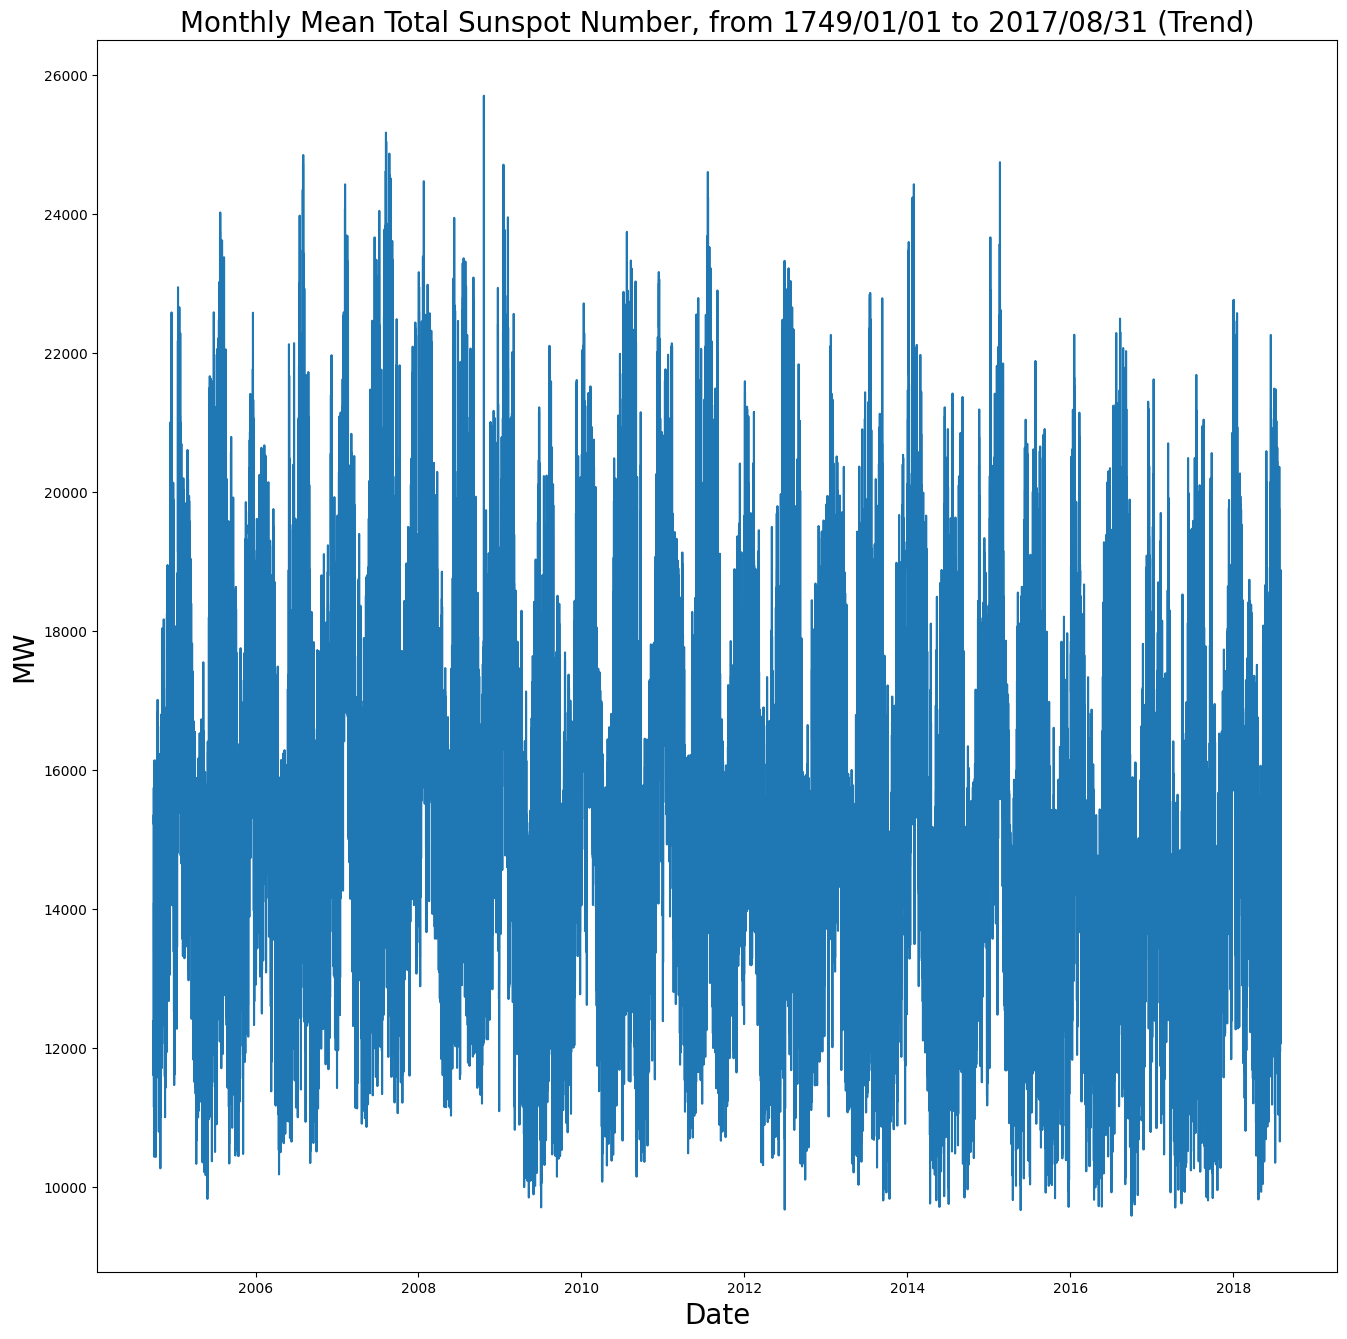

In [11]:
plot_aep_hr(df_entire, 0, df_entire.shape[0]-1, "Trend",
            title_name, 'MW')

### Yearly Plots (Seasonality)

In [12]:
yearly_df = df_entire.query("Datetime >= '2008-01-01' \
                       and Datetime <= '2009-01-01'")
yearly_df

,AEP_MW
Datetime,
2008-01-01 00:00:00,15411
2008-01-01 01:00:00,14755
2008-01-01 02:00:00,14475
2008-01-01 03:00:00,14217
2008-01-01 04:00:00,14149
...,...
2008-12-31 20:00:00,18670
2008-12-31 21:00:00,18319
2008-12-31 22:00:00,17963


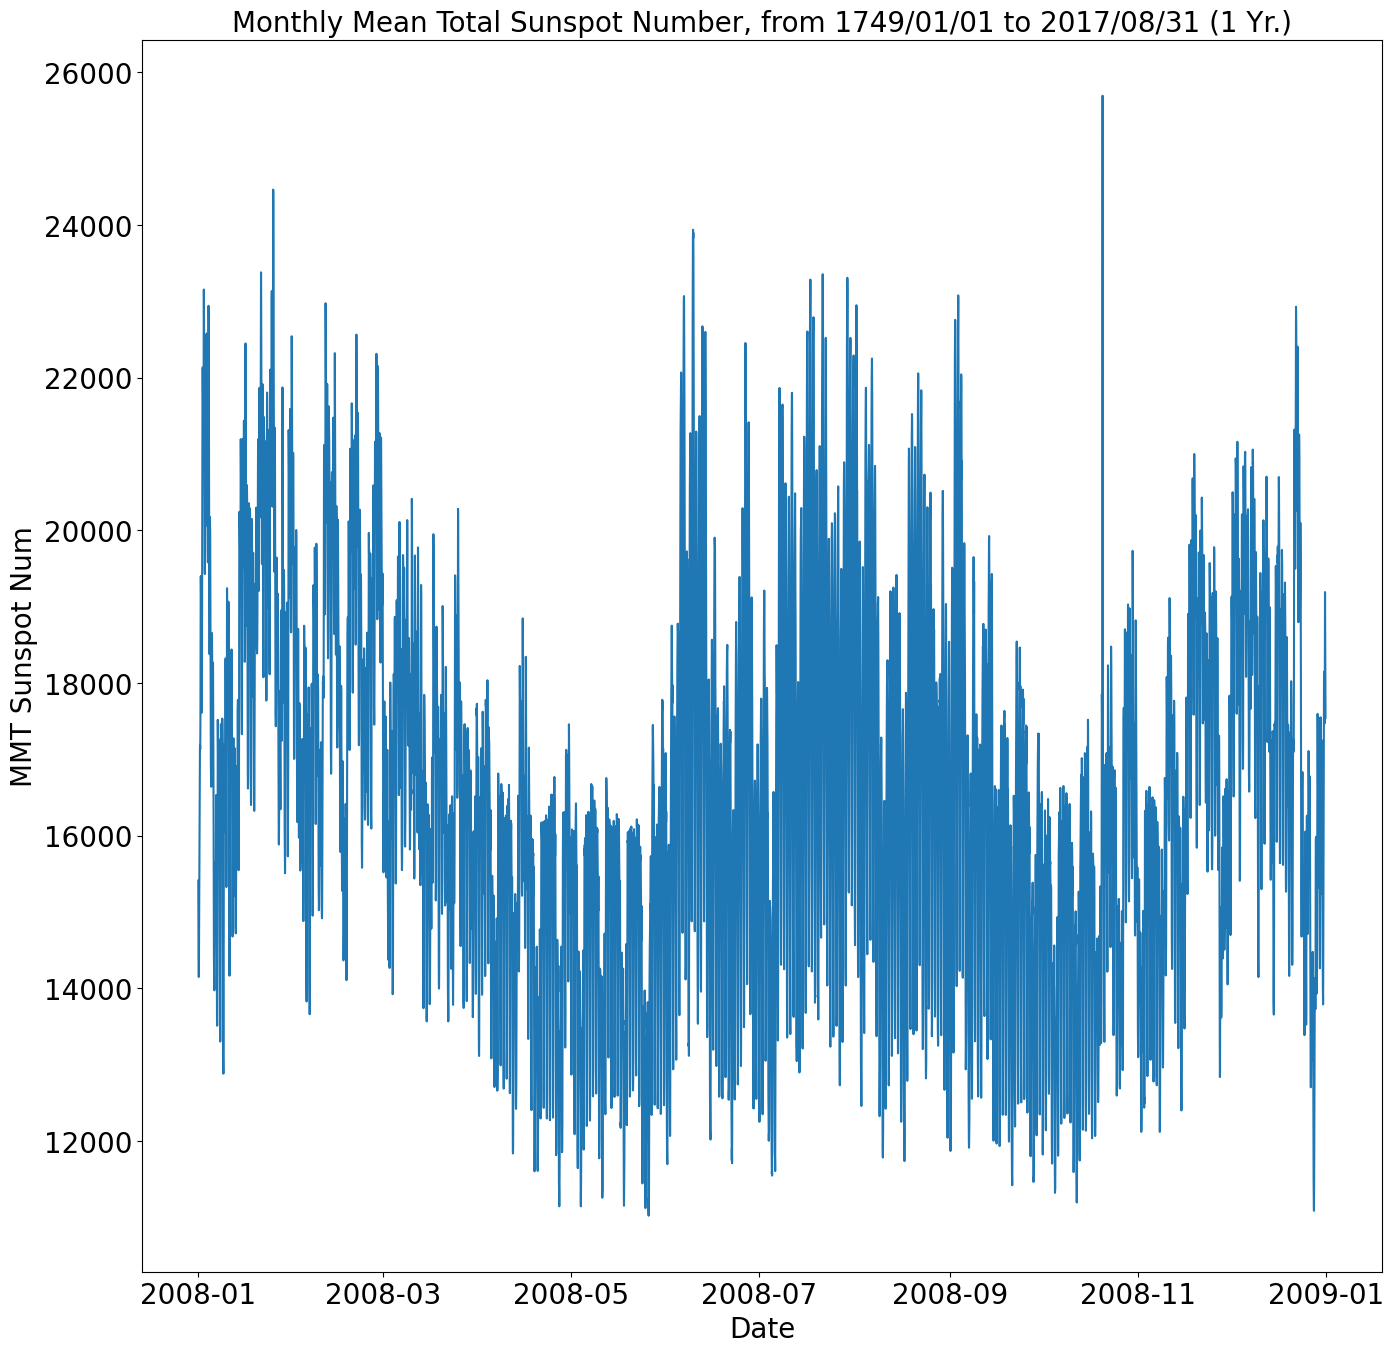

In [13]:
plot_aep_hr(yearly_df, 0, yearly_df.shape[0]-1, "1 Yr.",
                 title_name, 'MMT Sunspot Num')

### Monthly Plots (Seasonality)

In [14]:
monthly_df = df_entire.query("Datetime >= '2008-05-01' \
                       and Datetime <= '2008-06-01'")

monthly_df

,AEP_MW
Datetime,
2008-05-01 00:00:00,14044
2008-05-01 01:00:00,13230
2008-05-01 02:00:00,12982
2008-05-01 03:00:00,12869
2008-05-01 04:00:00,12878
...,...
2008-05-31 20:00:00,16532
2008-05-31 21:00:00,16178
2008-05-31 22:00:00,16316


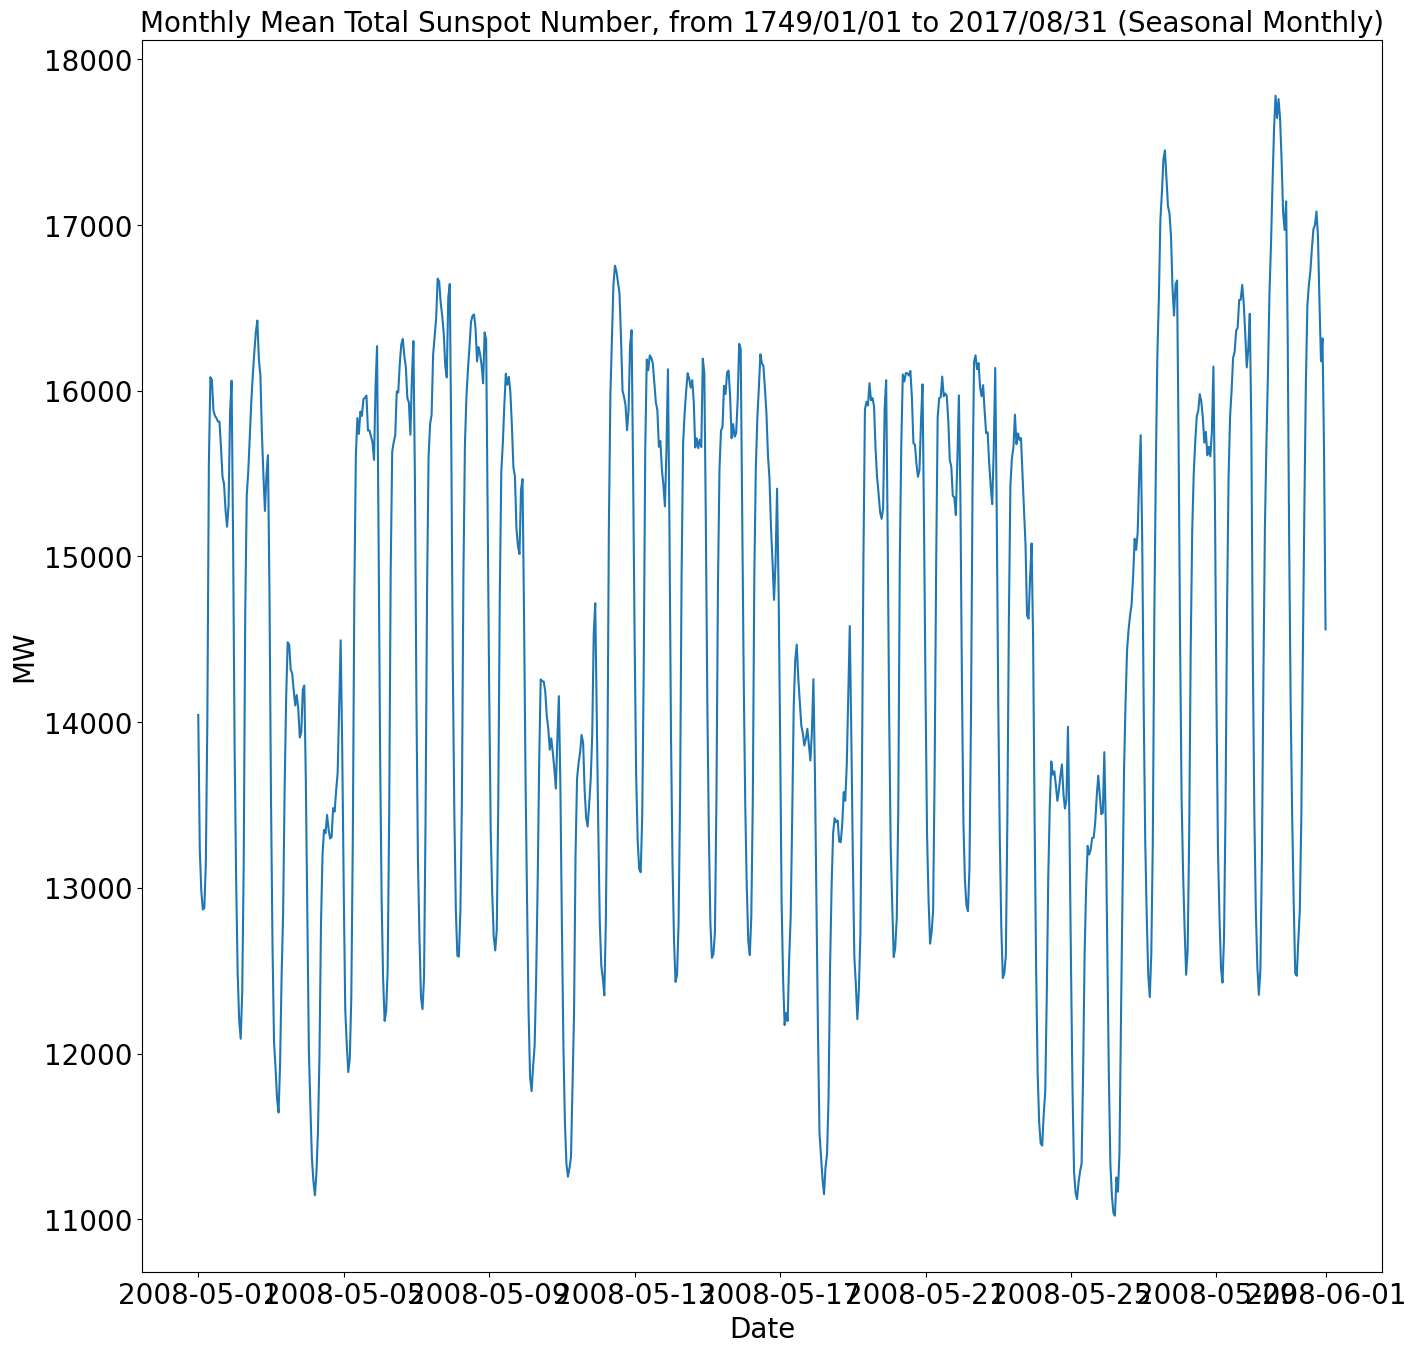

In [15]:
plot_aep_hr(monthly_df, 0, monthly_df.shape[0], "Seasonal Monthly", title_name,
            'MW')

### Weekly Plots (Seasonality)

In [16]:
weekly_df = df_entire.query("Datetime >= '2008-05-04' \
                       and Datetime <= '2008-05-10'")
weekly_df

,AEP_MW
Datetime,
2008-05-04 00:00:00,12816
2008-05-04 01:00:00,12017
2008-05-04 02:00:00,11677
2008-05-04 03:00:00,11369
2008-05-04 04:00:00,11230
...,...
2008-05-09 20:00:00,15015
2008-05-09 21:00:00,15401
2008-05-09 22:00:00,15467


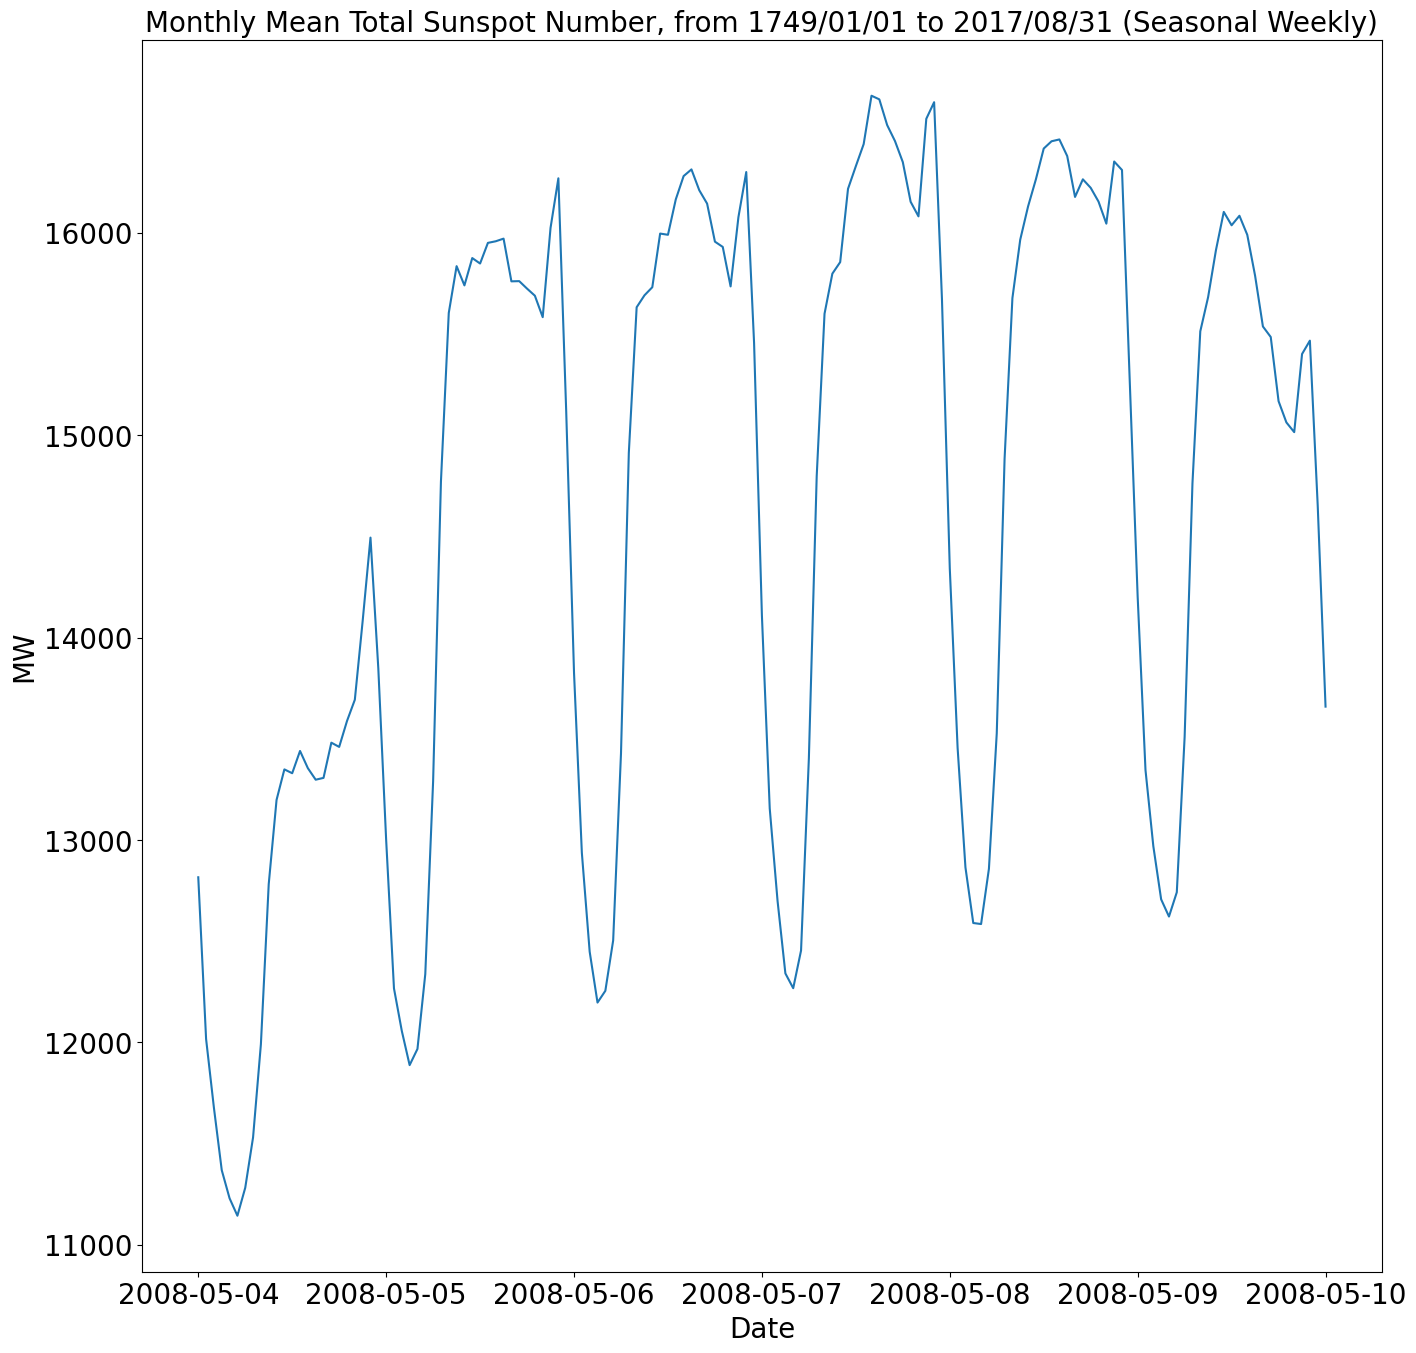

In [17]:
plot_aep_hr(weekly_df, 0, weekly_df.shape[0], "Seasonal Weekly", title_name,
            'MW')

### Daily Plots (Seasonality)

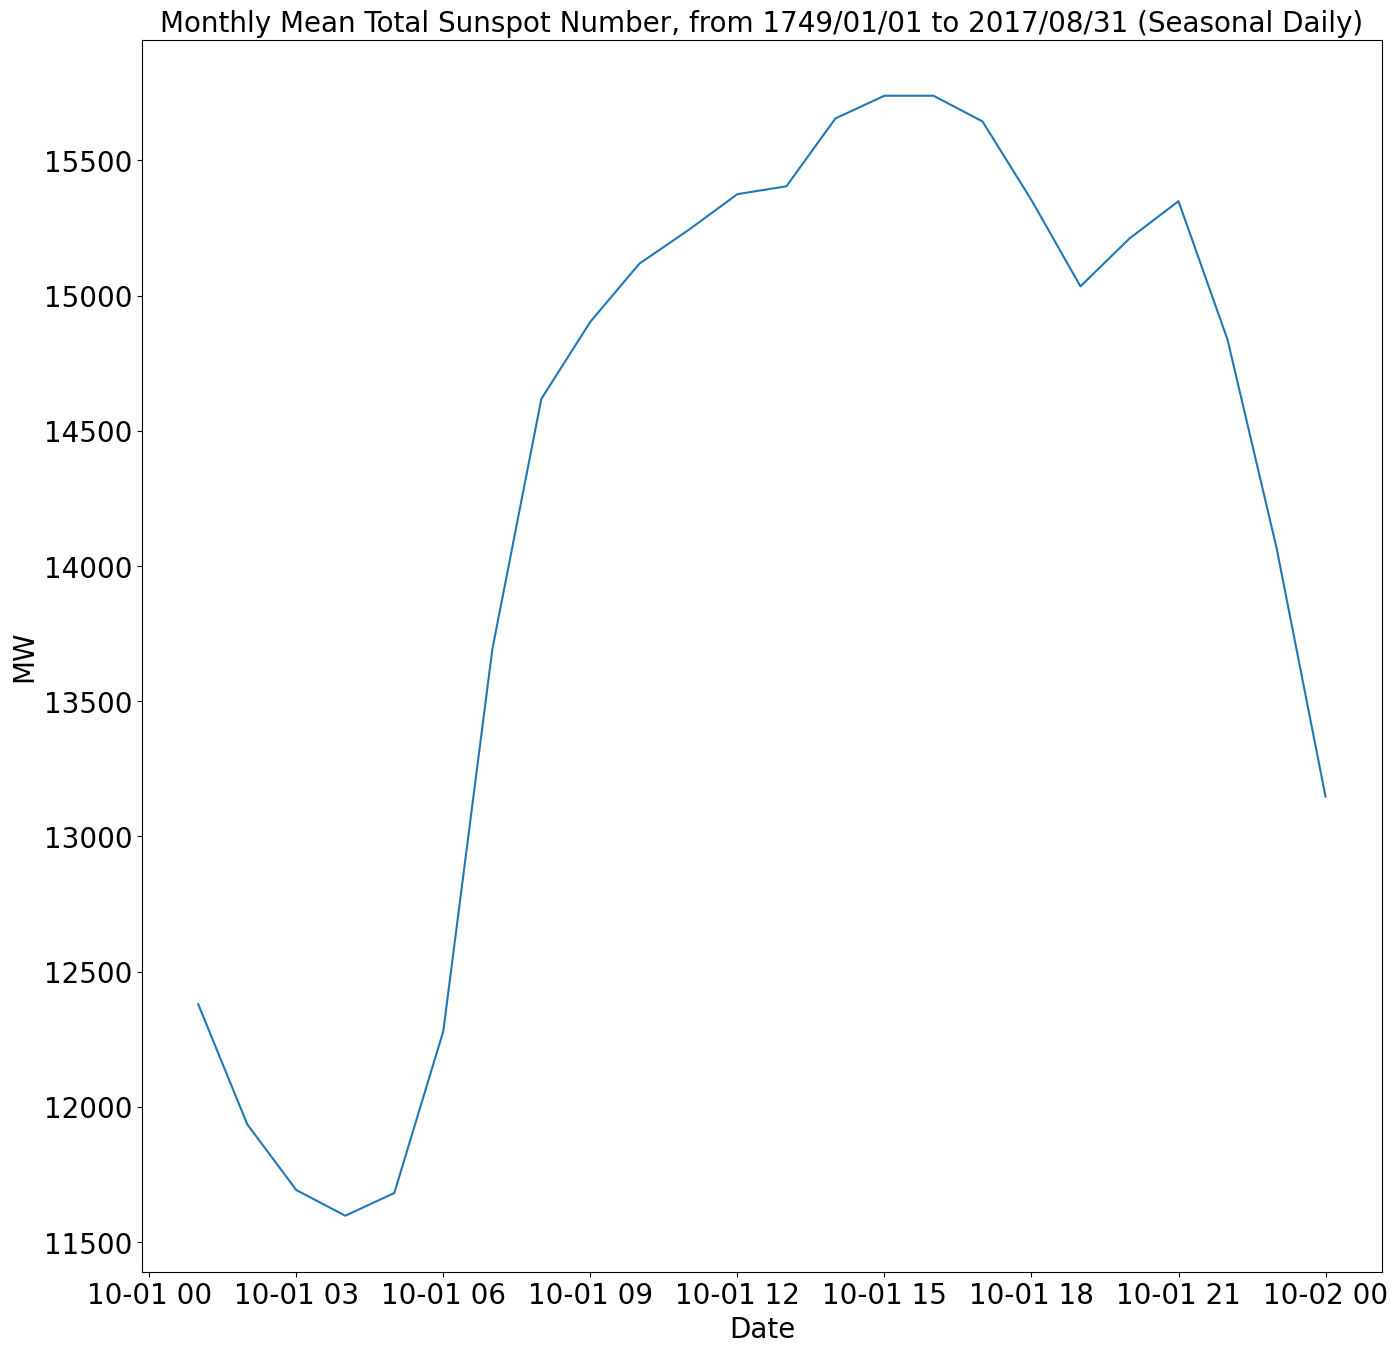

In [18]:
plot_aep_hr(df_entire, 0, 24, "Seasonal Daily", title_name, 'MW')

# Normalization Process

In [19]:
def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

def normalize_data(df):
    scaler_type = 'minmax'
    #scaler_type = input("Enter a scaler type (minmax,standard, maxabs, robust): ")
    if (scaler_type != 'minmax') and (scaler_type != 'standard') and (scaler_type != 'maxabs') and (scaler_type != 'robust'):
      runtime.unassign()

    scaler = get_scaler(scaler_type)
    normalized_data_MMT = scaler.fit_transform(df['AEP_MW'].
                                               values.reshape(-1,1))
    df['AEP_MW_Norm'] = normalized_data_MMT
    return df, scaler

df_norm, scaler = normalize_data(df_entire)
df_norm_yr, scaler = normalize_data(yearly_df)

In [20]:
df_norm

,AEP_MW,AEP_MW_Norm
Datetime,,
2004-10-01 01:00:00,12379,0.173638
2004-10-01 02:00:00,11935,0.146084
2004-10-01 03:00:00,11692,0.131004
2004-10-01 04:00:00,11597,0.125109
2004-10-01 05:00:00,11681,0.130321
...,...,...
2018-08-02 20:00:00,17673,0.502172
2018-08-02 21:00:00,17303,0.479211
2018-08-02 22:00:00,17001,0.460469


# Let's observe train and test data on the graph

## Split into Train/Test Data.

In [21]:
test_size = 0.2 # Set Split rate to 3:1 (80 % Training 20 % Test).
split_pos = int(df_entire.shape[0]*(1 - test_size))
df_entire = df_entire.reset_index()
df_entire

,Datetime,AEP_MW,AEP_MW_Norm
0,2004-10-01 01:00:00,12379,0.173638
1,2004-10-01 02:00:00,11935,0.146084
2,2004-10-01 03:00:00,11692,0.131004
3,2004-10-01 04:00:00,11597,0.125109
4,2004-10-01 05:00:00,11681,0.130321
...,...,...,...
121268,2018-08-02 20:00:00,17673,0.502172
121269,2018-08-02 21:00:00,17303,0.479211
121270,2018-08-02 22:00:00,17001,0.460469
121271,2018-08-02 23:00:00,15964,0.396115


In [22]:
# 2019-02-06 will be the date seperation. Dates past this will be the test set.
split_date = str(df_entire.Datetime[split_pos])
#split_date = split_date[:10]
#DOM_train = df_norm.loc[df_norm.index <= split_date].copy()
DOM_train = df_entire.loc[df_norm.index <= split_date].copy()
#DOM_test = df_norm.loc[df_norm.index > split_date].copy()
DOM_test = df_entire.loc[df_norm.index > split_date].copy()
split_date

'2015-10-27 10:00:00'

## Plot Train/Test Split Graphs.

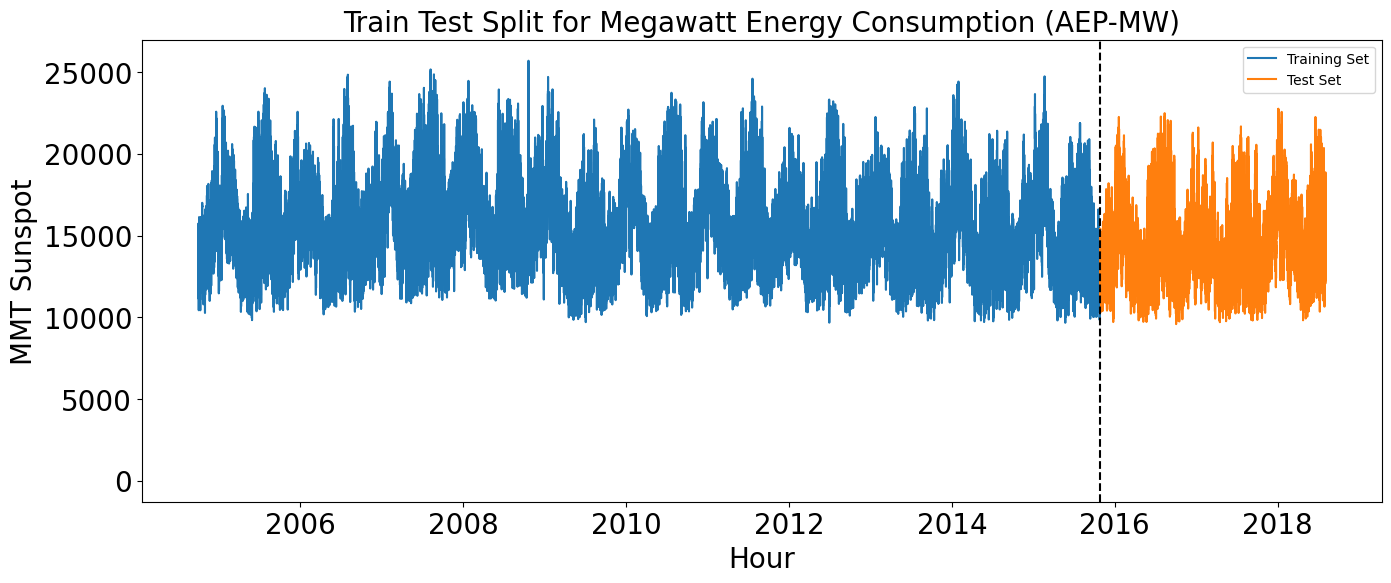

In [23]:
# Monthly Mean Total Sunspot Number Train Test Split
plt.figure(figsize=(16,6))
plt.plot(DOM_train['Datetime'], DOM_train['AEP_MW'],
         label='Training Set')
plt.plot(DOM_test['Datetime'], DOM_test['AEP_MW'],
         label='Testing Set')
plt.axvline(x = df_entire.Datetime[split_pos], color='black', ls='--')
plt.legend(['Training Set', 'Test Set'])
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("MMT Sunspot", fontsize = 20)
plt.title("Train Test Split for Megawatt Energy Consumption (AEP-MW)",
          fontsize = 20)
plt.show()

In [24]:
# We index the Datetime column after transformation
df_entire.set_index('Datetime', inplace=True)
df_entire.head()

,AEP_MW,AEP_MW_Norm
Datetime,,
2004-10-01 01:00:00,12379,0.173638
2004-10-01 02:00:00,11935,0.146084
2004-10-01 03:00:00,11692,0.131004
2004-10-01 04:00:00,11597,0.125109
2004-10-01 05:00:00,11681,0.130321


In [25]:
df_entire1 = df_entire.drop(columns = ['AEP_MW_Norm'])
df_entire1

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379
2004-10-01 02:00:00,11935
2004-10-01 03:00:00,11692
2004-10-01 04:00:00,11597
2004-10-01 05:00:00,11681
...,...
2018-08-02 20:00:00,17673
2018-08-02 21:00:00,17303
2018-08-02 22:00:00,17001


In [26]:
df_entire2 = df_entire.drop(columns = ['AEP_MW'])
df_entire2

,AEP_MW_Norm
Datetime,
2004-10-01 01:00:00,0.173638
2004-10-01 02:00:00,0.146084
2004-10-01 03:00:00,0.131004
2004-10-01 04:00:00,0.125109
2004-10-01 05:00:00,0.130321
...,...
2018-08-02 20:00:00,0.502172
2018-08-02 21:00:00,0.479211
2018-08-02 22:00:00,0.460469


# ARIMA Modeling.

In [27]:
df_copy = df_norm.copy()
df_copy

,AEP_MW,AEP_MW_Norm
Datetime,,
2004-10-01 01:00:00,12379,0.173638
2004-10-01 02:00:00,11935,0.146084
2004-10-01 03:00:00,11692,0.131004
2004-10-01 04:00:00,11597,0.125109
2004-10-01 05:00:00,11681,0.130321
...,...,...
2018-08-02 20:00:00,17673,0.502172
2018-08-02 21:00:00,17303,0.479211
2018-08-02 22:00:00,17001,0.460469


# Decomposition (Additive and Multiplicative).

## Additive Decomposition

<Figure size 1440x960 with 0 Axes>

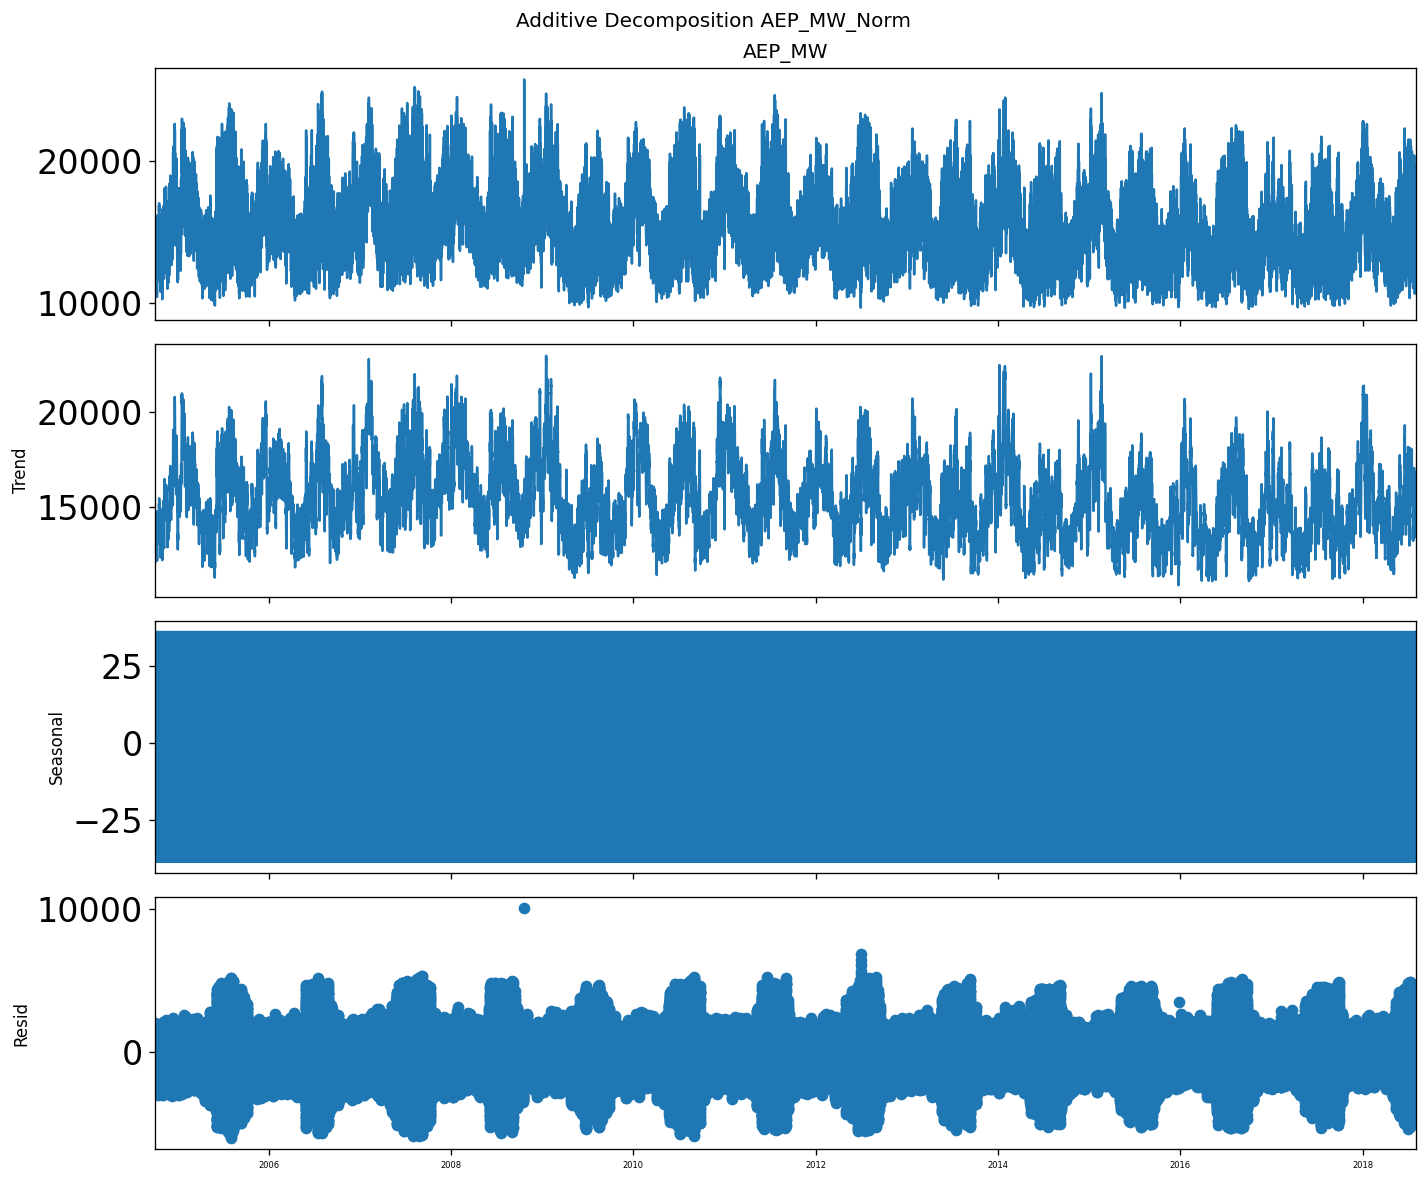

In [31]:
def additive_decomp(df_feature, feature):
  additive_dec_df = seasonal_decompose(df_feature, model='additive', period=30)
  plt.figure(figsize=(12,8))
  additive_dec_df.plot()
  plt.suptitle('Additive Decomposition {0}'.format(feature), fontsize=12)
  plt.tight_layout()
  plt.show()

additive_decomp(df_copy['AEP_MW'], 'AEP_MW_Norm')

## Multiplicative Decomposition

In [32]:
'''def mult_decomp(df_feature, feature):
    mult_dec_df = seasonal_decompose(df_feature, model='multiplicative',
                                      period=30)
    plt.figure(figsize=(12,8))
    mult_dec_df.plot()
    plt.suptitle('Multiplicative Decomposition {0}'.format(feature),
                 fontsize=12)
    plt.tight_layout()
    plt.show()

mult_decomp(df_copy['Monthly Mean Total Sunspot Number'], 'MMTSN_Norm')'''

"def mult_decomp(df_feature, feature):\n    mult_dec_df = seasonal_decompose(df_feature, model='multiplicative',\n                                      period=30)\n    plt.figure(figsize=(12,8))\n    mult_dec_df.plot()\n    plt.suptitle('Multiplicative Decomposition {0}'.format(feature),\n                 fontsize=12)\n    plt.tight_layout()\n    plt.show()\n\nmult_decomp(df_copy['Monthly Mean Total Sunspot Number'], 'MMTSN_Norm')"

# Dickey Fuller Test.

H0: time series data is non-stationary

H1: time series data is stationary

p-value < 0.05 -> reject null hypothesis (H0)

In [33]:
result_adfuller = adfuller(df_copy['AEP_MW_Norm'], autolag='AIC')
print(f'ADF Statistic: {result_adfuller[0]}')
print(f'p-value: {result_adfuller[1]}')

ADF Statistic: -18.28588388225591
p-value: 2.3029539101762635e-30


# KPSS Test

H0: time series data is stationary

H1: time series data is non-stationary

p-value < 0.05 -> reject null hypothesis (H0)

In [34]:
result_kpss = kpss(df_copy['AEP_MW_Norm'])
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')

KPSS Statistic: 6.942701981075201
p-value: 0.01


<ipython-input-34-10981f04ae3a>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df_copy['AEP_MW_Norm'])


# Rolling Test

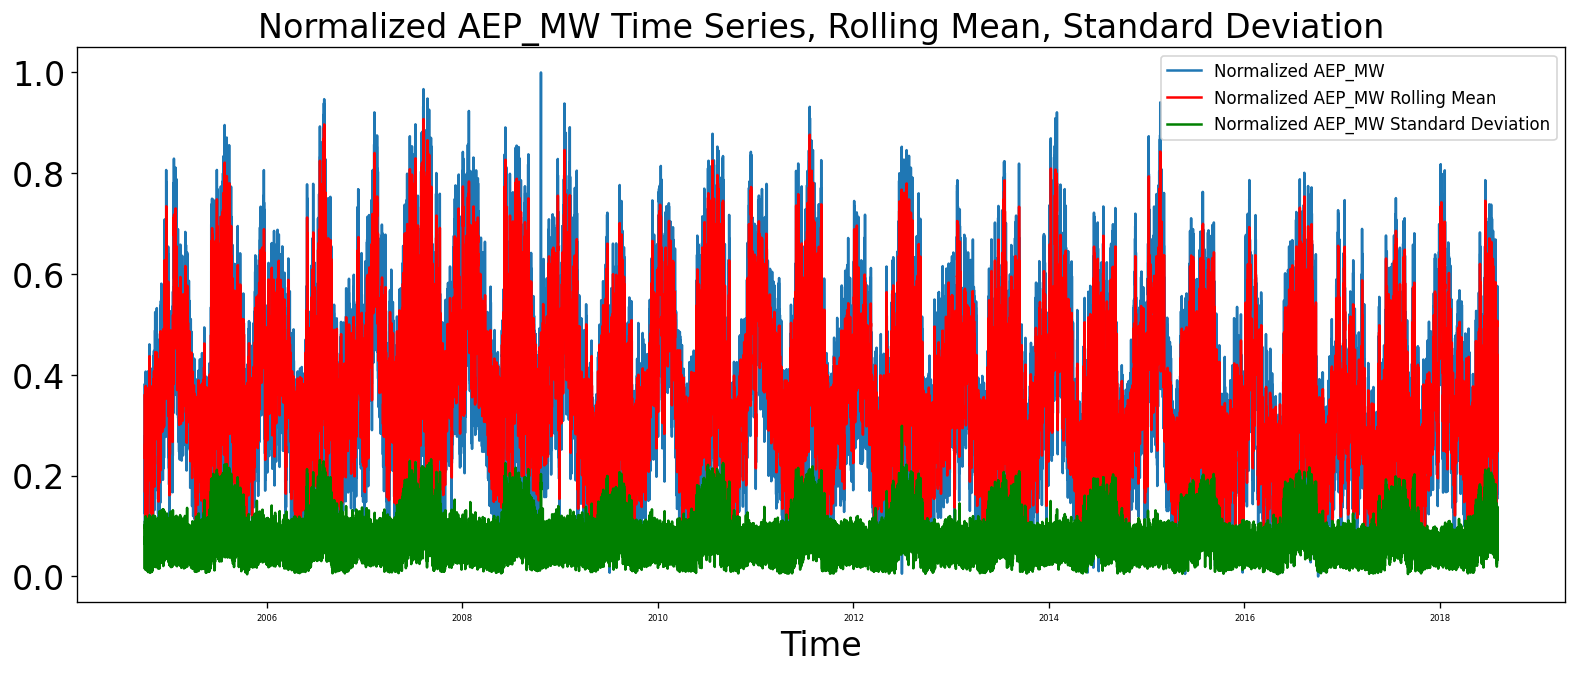

In [35]:
def rolling_test(selected_df, feature):
  rolling_mean = selected_df.rolling(12).mean()
  rolling_std =  selected_df.rolling(12).std()
  plt.figure(figsize=(16,6))
  plt.plot(selected_df, label=feature)
  plt.plot(rolling_mean, color="red",
          label="{0} Rolling Mean".format(feature))
  plt.plot(rolling_std, color="green",
          label="{0} Standard Deviation".format(feature))
  plt.xlabel('Time', fontsize = 20)
  plt.title("{0} Time Series, Rolling Mean, Standard Deviation".format(feature),
            fontsize = 20)
  plt.legend(loc='best')
  plt.show()

# Trend Rolling Test
rolling_test(df_copy['AEP_MW_Norm'],'Normalized AEP_MW')
# For Monthly.
#rolling_test(monthly_df,'Normalized AEP_MW Monthly')
# For Weekly.
#rolling_test(weekly_df['AEP_MW_Norm'],'Normalized AEP_MW Weekly')
# For Daily.
#rolling_test(df_copy['AEP_MW_Norm'],'Normalized AEP_MW Daily')
# For One Year.
#rolling_test(yearly_df['AEP_MW_Norm'],'Normalized AEP_MW Yearly')

# ARIMA Model Parameter Setup

## ARIMA d Parameter

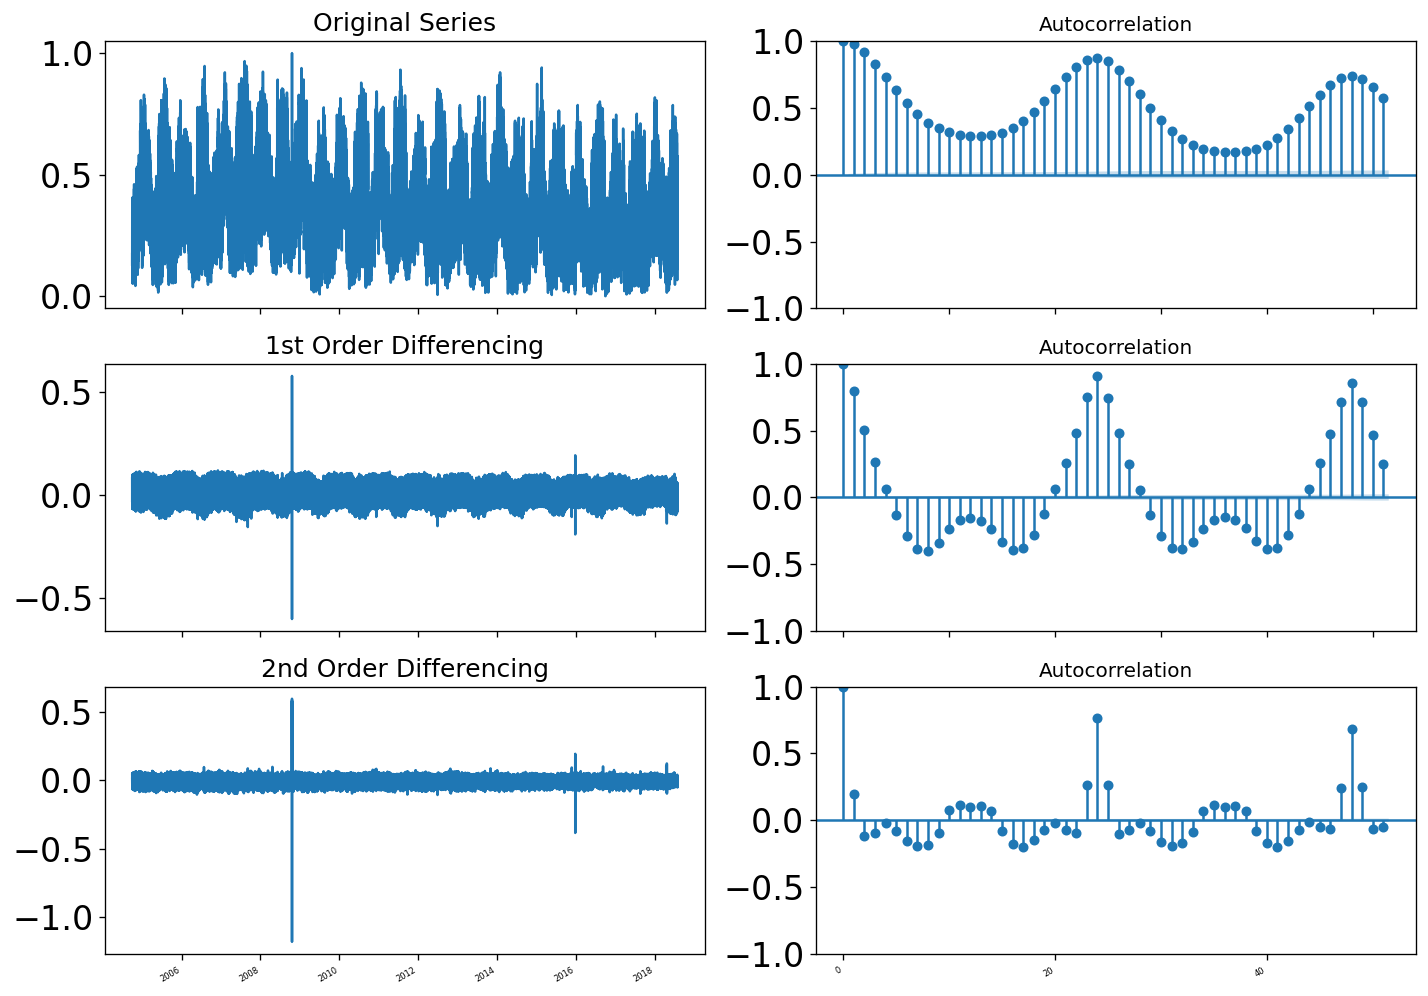

In [36]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
#axes[0, 0].plot(df_copy['Monthly Mean Total Sunspot Number'])
axes[0, 0].plot(df_copy['AEP_MW_Norm'])

axes[0, 0].set_title('Original Series', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].values, ax=axes[0, 1])
plot_acf(df_copy['AEP_MW_Norm'].values, ax=axes[0, 1])
plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# 1st Differencing
#axes[1, 0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[1, 0].plot(df_copy['AEP_MW_Norm'].diff())
axes[1, 0].set_title('1st Order Differencing', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[1, 1])
plot_acf(df_copy['AEP_MW_Norm'].diff().dropna(), ax=axes[1, 1])
plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# 2nd Differencing
#axes[2, 0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[2, 0].plot(df_copy['AEP_MW_Norm'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing', fontsize = 15)
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().diff().dropna(), ax=axes[2, 1])
plot_acf(df_copy['AEP_MW_Norm'].diff().diff().dropna(), ax=axes[2, 1])
plt.rc('xtick', labelsize=15)
#plt.rc('ytick', labelsize=15)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

plt.tight_layout()
fig.autofmt_xdate()
plt.show()

## AR Term (p)

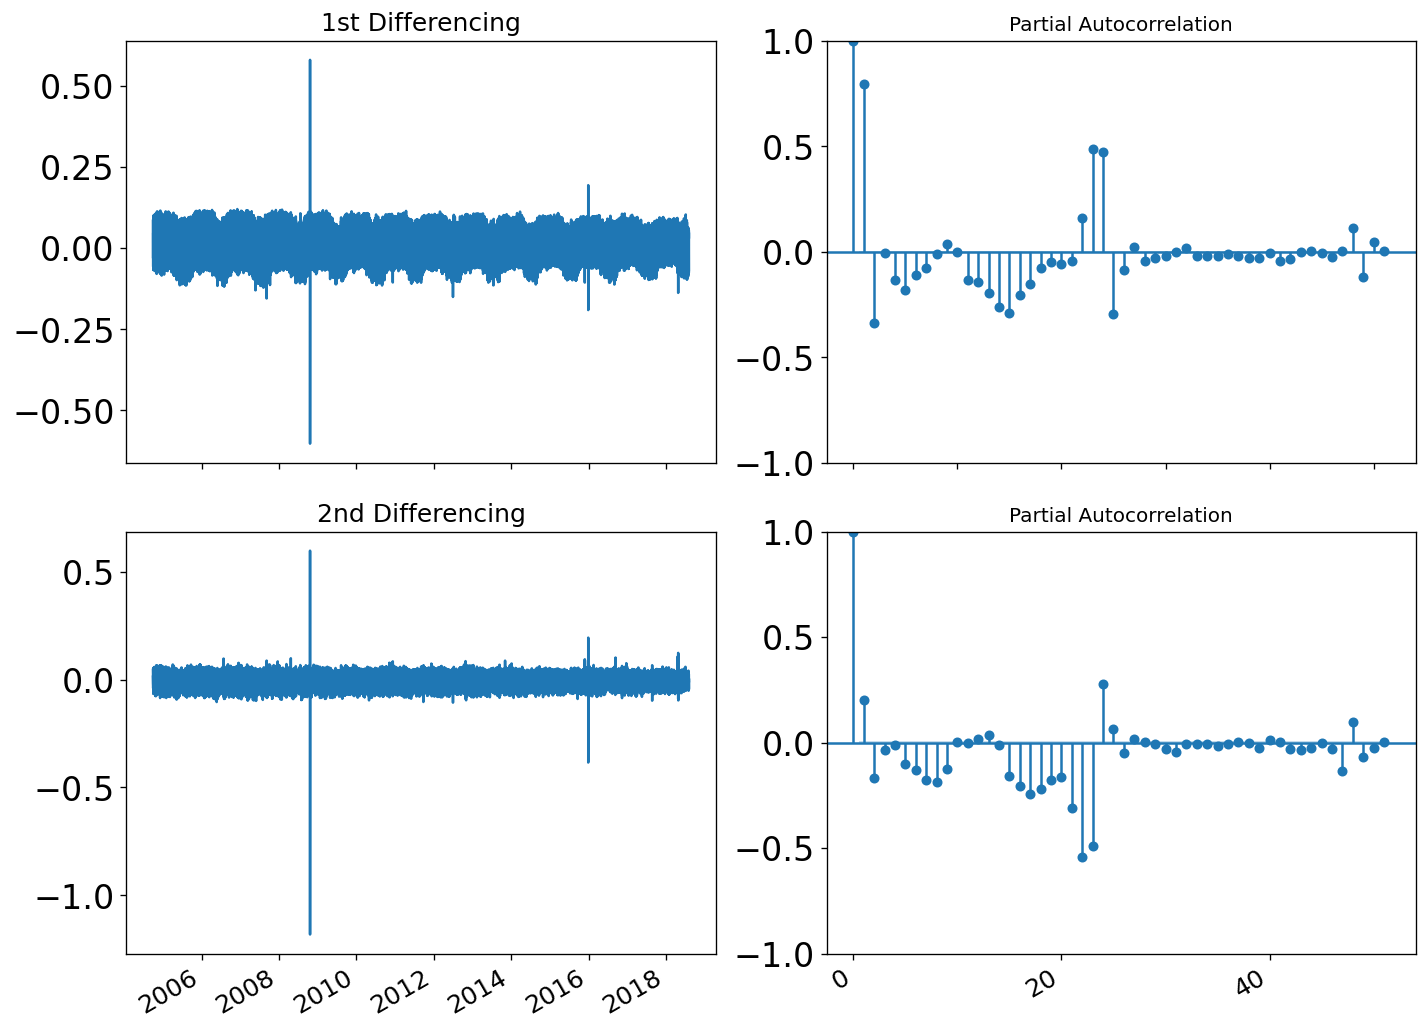

In [37]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# PACF plot of 1st differenced series
#axes[0,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[0,0].plot(df_copy['AEP_MW_Norm'].diff())

axes[0,0].set_title('1st Differencing', fontsize = 15)
axes[0,1].set(ylim=(0,5))
#plot_pacf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[1,1])
plot_pacf(df_copy['AEP_MW_Norm'].diff().dropna(), ax=axes[0,1])
plt.rc('xtick', labelsize=5)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# PACF plot of 2nd differenced series
#axes[1,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[1,0].plot(df_copy['AEP_MW_Norm'].diff().diff())
axes[1,0].set_title('2nd Differencing', fontsize = 15)
axes[1,1].set(ylim=(0,5))
plot_pacf(df_copy['AEP_MW_Norm'].diff().diff().dropna(),
          ax=axes[1,1])
plt.rc('xtick', labelsize=5)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
plt.tight_layout()
fig.autofmt_xdate()
plt.show()

## MA Term (q)

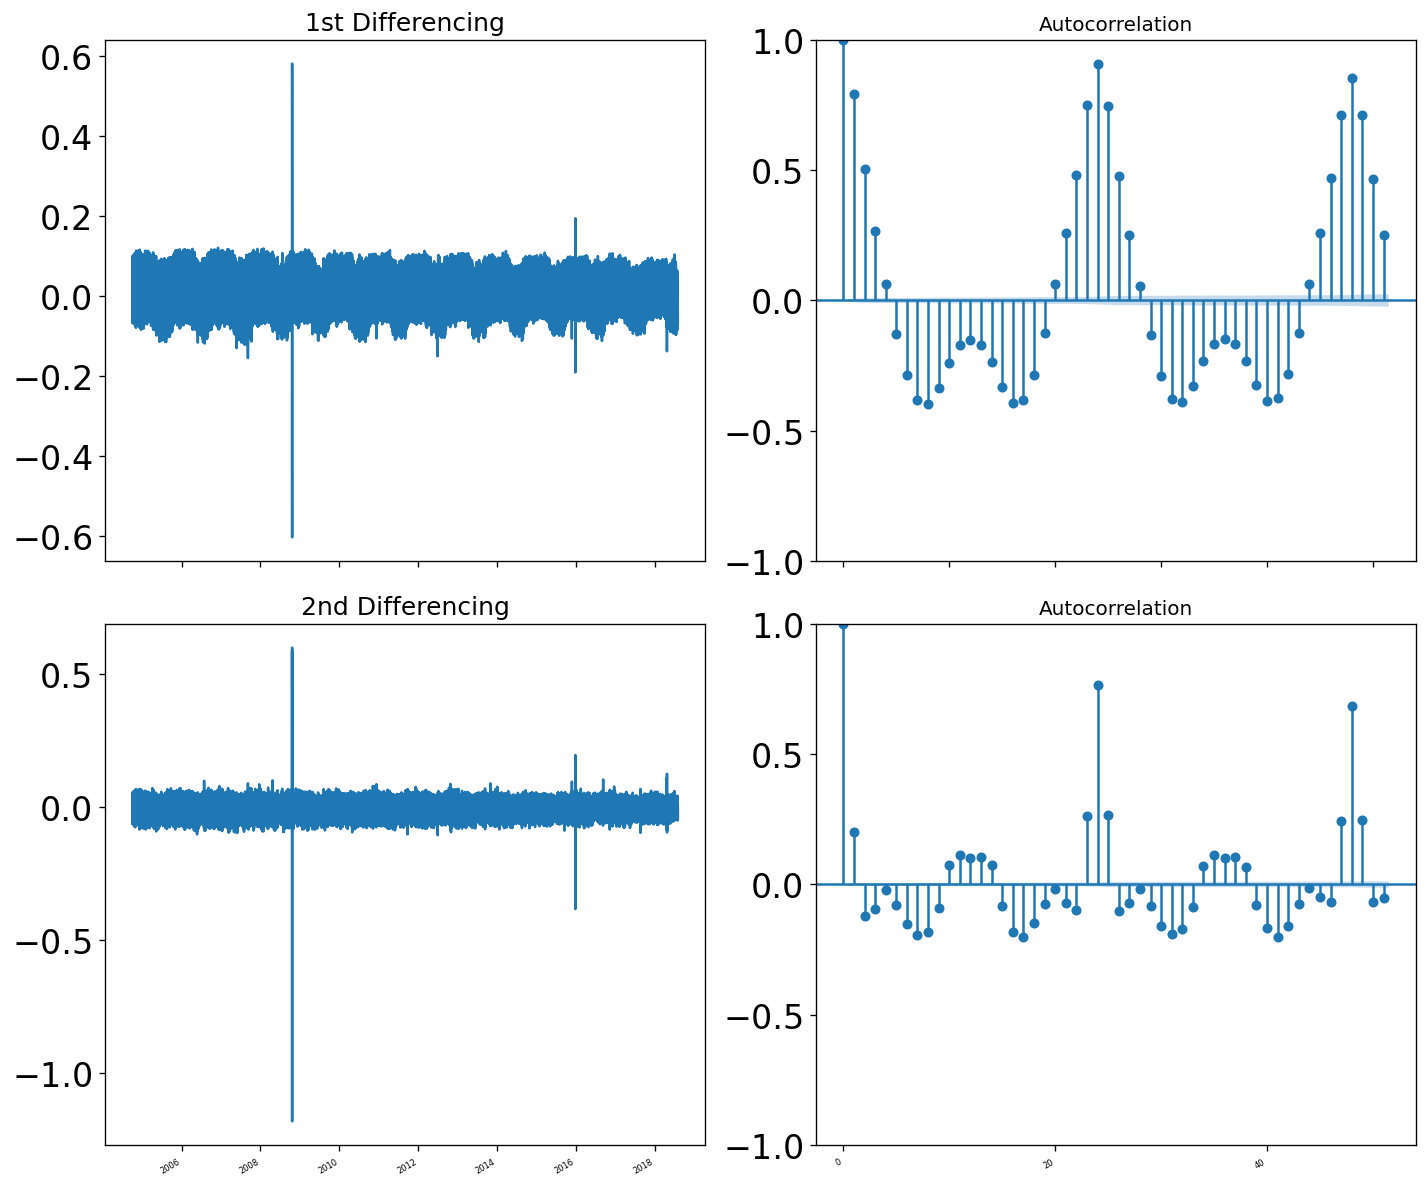

In [38]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})

fig, axes = plt.subplots(2, 2, sharex=False)

# ACF plot of 1st differenced series
#axes[0,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff())
axes[0,0].plot(df_copy['AEP_MW_Norm'].diff())


axes[0,0].set_title('1st Differencing', fontsize = 15)
axes[0,1].set(ylim=(0,5))
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().dropna(), ax=axes[0,1])
plot_acf(df_copy['AEP_MW_Norm'].diff().dropna(), ax=axes[0,1])
plt.rc('xtick', labelsize=5)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

# ACF plot of 2nd differenced series
#axes[1,0].plot(df_copy['Monthly Mean Total Sunspot Number'].diff().diff())
axes[1,0].plot(df_copy['AEP_MW_Norm'].diff().diff())
axes[1,0].set_title('2nd Differencing', fontsize = 15)
axes[1,1].set(ylim=(0,5))
#plot_acf(df_copy['Monthly Mean Total Sunspot Number'].diff().diff().dropna(), ax=axes[1,1])
plot_acf(df_copy['AEP_MW_Norm'].diff().diff().dropna(), ax=axes[1,1])
plt.rc('xtick', labelsize=5)
#plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# ARIMA Model

Portions of the remaining code inspired from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/.

## Essential Variables

In [ ]:
#Feature = 'VHT (Veh-Hours)'
Feature = 'AEP_MW_Norm'
series = df_copy[Feature]
#series = selected_df[feature]
#series.index = df_copy[feature_norm].index
series.index = df_copy[Feature].index
# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train_v1, test_v1 = X[0:size], X[size:len(X)]
history = [x for x in train_v1]
predictions = list()

## Creating and Training Model.

In [ ]:
# Re-train ARIMA
#model = ARIMA(selected_df[feature_norm], order=(p, d, q))
model = ARIMA(df_copy[Feature], order=(0, 0, 0))
Ar = model.fit()

# Forecast
fc = Ar.get_forecast(test_v1.shape[0]).summary_frame()
# fc_conf_int = fc.conf_int(alpha=0.05)
fc = pd.DataFrame(fc).rename({'mean':'#{0}'.format(Feature)},axis=1)
fc

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


AEP_MW_Norm,#AEP_MW_Norm,mean_se,mean_ci_lower,mean_ci_upper
121273,0.367285,0.160811,0.052101,0.682469
121274,0.367285,0.160811,0.052101,0.682469
121275,0.367285,0.160811,0.052101,0.682469
121276,0.367285,0.160811,0.052101,0.682469
121277,0.367285,0.160811,0.052101,0.682469
...,...,...,...,...
145523,0.367285,0.160811,0.052101,0.682469
145524,0.367285,0.160811,0.052101,0.682469
145525,0.367285,0.160811,0.052101,0.682469
145526,0.367285,0.160811,0.052101,0.682469


In [ ]:
# walk-forward validation

def f1(l, i):
    l.acquire()
    try:
        model = ARIMA(history, order=(0,0,0))
        warnings.simplefilter('ignore', ConvergenceWarning)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test_v1[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    finally:
        l.release()

lock1 = Lock()
for t in range(len(test_v1)):
    if (t % 100 == 0):
      print("t: ", t)
      model = ARIMA(history, order=(0,0,0))
      warnings.simplefilter('ignore', ConvergenceWarning)
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test_v1[t]
      history.append(obs)
    else:
      Process(target=f1, args=(lock1, t)).start()

t:  0


Process Process-33:


## Evaluation

In [ ]:
arima_mae_v1 = mean_absolute_error(test_v1,predictions)
print("MAE of ARIMA Statistical model = ", arima_mae_v1)
arima_rmse_v1 =  mean_squared_error(test_v1, predictions) ** 0.5
print("RMSE of ARIMA Statistical model = ",arima_rmse_v1)
#arima_r2_v1 = r2_score(test_v1, predictions)
#print("R^2 Score of ARIMA Statistical model = ",arima_r2_v1)
arima_mape_v1 = 100*mean_absolute_percentage_error(test_v1, predictions)
print("MAPE Score of ARIMA Statistical model = {0} %".format(arima_mape_v1))

## Residual Plots

In [ ]:
selected_df = df_copy.reset_index()
selected_df

In [ ]:
residual_ARIMA_v1 = np.array(predictions) - test_v1
plt.scatter(selected_df['Datetime'][size:], residual_ARIMA_v1)
plt.axhline(y=0, color = 'black')
plt.title("Differences between Acutal and Predicted Values for ARIMA V1.",
          fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Residual", fontsize = 20)
plt.show()

# AutoARIMA Model

The model was trained using https://medium.com/analytics-vidhya/assessment-of-accuracy-metrics-for-time-series-forecasting-bc115b655705

In [ ]:
Feature = 'AEP_MW_Norm'
series = df_copy[Feature]
#series = selected_df[feature]
#series.index = df_copy[feature_norm].index
series.index = df_copy[Feature].index
# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train_v1, test_v1 = X[0:size], X[size:len(X)]
history = [x for x in train_v1]
predictions = list()

In [ ]:
df_norm = df_norm.reset_index()
df_norm

,Datetime,AEP_MW,AEP_MW_Norm
0,2004-10-01 01:00:00,12379,0.173638
1,2004-10-01 02:00:00,11935,0.146084
2,2004-10-01 03:00:00,11692,0.131004
3,2004-10-01 04:00:00,11597,0.125109
4,2004-10-01 05:00:00,11681,0.130321
...,...,...,...
121268,2018-08-02 20:00:00,17673,0.502172
121269,2018-08-02 21:00:00,17303,0.479211
121270,2018-08-02 22:00:00,17001,0.460469
121271,2018-08-02 23:00:00,15964,0.396115


In [ ]:
input_df = pd.DataFrame({'unique_id': [1.0]*df_norm.shape[0],
                         'ds': df_norm['Datetime'],
                         'y': df_norm[Feature]})
input_df

,unique_id,ds,y
0,1.0,2004-10-01 01:00:00,0.173638
1,1.0,2004-10-01 02:00:00,0.146084
2,1.0,2004-10-01 03:00:00,0.131004
3,1.0,2004-10-01 04:00:00,0.125109
4,1.0,2004-10-01 05:00:00,0.130321
...,...,...,...
121268,1.0,2018-08-02 20:00:00,0.502172
121269,1.0,2018-08-02 21:00:00,0.479211
121270,1.0,2018-08-02 22:00:00,0.460469
121271,1.0,2018-08-02 23:00:00,0.396115


In [ ]:
size = int(len(X) * 0.8)
train_v2, test_v2 = input_df[:size], input_df[size:]

## Create and Train Model.

In [ ]:
# Define the season length as 12 months for monthly data
season_length = 24

# Define a list of models for forecasting
models = [AutoARIMA(season_length=season_length)] # ARIMA model with automatic order selection and seasonal component

# Instantiate the StatsForecast class with models, data frequency
# ('M' for monthly), and parallel computation on all CPU cores (n_jobs=-1)
forecast = StatsForecast(
    models=models, # models for forecasting
    freq='H',  # frequency of the data
    n_jobs=-1  # number of jobs to run in parallel, -1 means using all processors
)

print(forecast)
# Fit the forecasting models to the training data
print(forecast.fit(train_v2))
#forecast_autoARIMA = forecast.fit(train_v2)
#print(forecast_autoARIMA)

# Perform the forecast for the length of the test data
prediction = forecast.predict(h=len(test_v2))

# Merge the test data with the forecasted values
final_test_data = pd.merge(test_v2, prediction)

# Display the first few rows of the merged data
final_test_data.head()

StatsForecast(models=[AutoARIMA])


## Plot forecasts against actual outcomes.

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(final_test_data['ds'], input_df['y'], color='blue',
         label='Actual {0}'.format('AEP_MW'))
plt.plot(final_test_data['ds'], final_test_data['AutoARIMA'], color='red',
         label='Predicted {0}'.format('AEP_MW'))
plt.xlabel('Time', fontsize = 20)
plt.ylabel('AEP_MW', fontsize = 20)
plt.title("{0} over Time using ARIMA".format('AEP_MW'), fontsize = 20)
plt.legend()
plt.show()

## Evaluation

In [ ]:
arima_mae_auto = mean_absolute_error(final_test_data['y'],
                                final_test_data['AutoARIMA'])
print("MAE of AutoARIMA Statistical model = ", arima_mae_auto)
arima_rmse_auto =  mean_squared_error(final_test_data['y'],
                                 final_test_data['AutoARIMA']) ** 0.5
print("RMSE of AutoARIMA Statistical model = ", arima_rmse_auto)
#arima_r2_auto = r2_score(final_test_data['y'], final_test_data['AutoARIMA'])
#print("R^2 Score of ARIMA Statistical model = ", arima_r2_auto)
arima_mape_auto = 100*mean_absolute_percentage_error(final_test_data['y'],
                                                 final_test_data['AutoARIMA'])
print("MAPE Score of AutoARIMA Statistical model = {0} % ".
      format(arima_mape_auto))

## Residual Plots

In [ ]:
actual_arr_autoARIMA = np.array(final_test_data['y'])
predicted_arr_autoARIMA = np.array(final_test_data['AutoARIMA'])
residuals_autoARIMA = predicted_arr_autoARIMA - actual_arr_autoARIMA
plt.scatter(final_test_data['ds'], residuals_autoARIMA)
plt.axhline(y=0, color = 'black')
plt.title("Differences between Acutal and Predicted Values for Auto ARIMA.",
          fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Residual", fontsize = 20)
plt.show()